In [1]:
# does everybody really die in the summer?

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# let's load the data from the /data folder
data = pd.read_csv('data/boston_shots_fired.csv')
data.head()

# the district column represents the different police districts in Boston
# maps of the districts are easily available online

,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,C11,f
1,I152000042-00,2015-01-01 00:05:00+00,A15,f
2,I152000514-00,2015-01-02 15:51:00+00,B3,t
3,I152000965-00,2015-01-04 15:30:00+00,B2,t
4,I152000872-00,2015-01-04 00:13:00+00,B2,f


In [3]:
data.dtypes

incident_num           object
incident_date          object
district               object
ballistics_evidence    object
dtype: object

In [4]:
# let's convert the date column to a datetime object that only displays year, month and day

data['incident_date'] = pd.to_datetime(data['incident_date'], format='ISO8601')
data['incident_date'] = data['incident_date'].dt.date
data['incident_date'] = pd.to_datetime(data['incident_date'], format='%Y-%m-%d')
data.head()


,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01,C11,f
1,I152000042-00,2015-01-01,A15,f
2,I152000514-00,2015-01-02,B3,t
3,I152000965-00,2015-01-04,B2,t
4,I152000872-00,2015-01-04,B2,f


In [5]:
# let's convert the ballistics column to a boolean where t means True and f means False

data['ballistics_evidence'] = data['ballistics_evidence'] == 't'
data.dtypes

incident_num                   object
incident_date          datetime64[ns]
district                       object
ballistics_evidence              bool
dtype: object

In [22]:
# now let's group the data by day and count the number of incidents per day

dailyShots = data.groupby('incident_date').count()
dailyShots.head()
dailyShots.dtypes

incident_num           int64
district               int64
ballistics_evidence    int64
dtype: object

<Axes: xlabel='incident_date'>

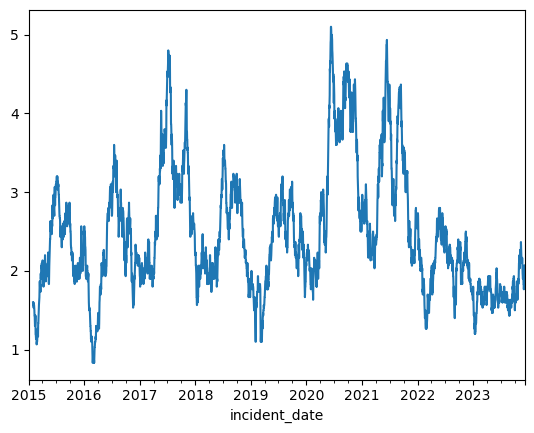

In [9]:
# let's get a 30 day moving average of the daily data for all years

daily['incident_num'].rolling(30).mean().plot()


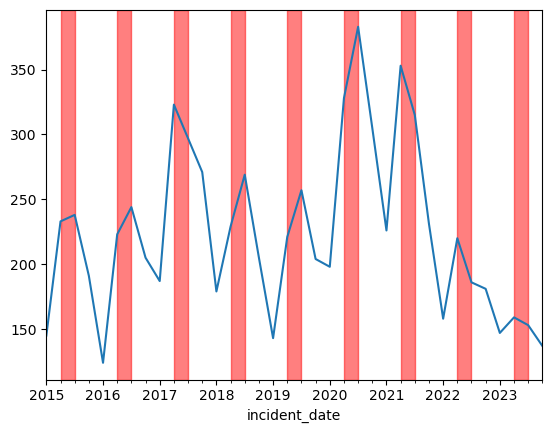

In [10]:
# finally let's look at the quarterly data and highlight the summer months in red

# "I heard everybody's dying in the summer"
# "So pray to God for a little more spring"
# - Chance the Rapper, Paranoia

quarterly['incident_num'].plot()
plt.axvspan('2015-06-30', '2015-09-30', color='red', alpha=0.5)
plt.axvspan('2016-06-30', '2016-09-30', color='red', alpha=0.5)
plt.axvspan('2017-06-30', '2017-09-30', color='red', alpha=0.5)
plt.axvspan('2018-06-30', '2018-09-30', color='red', alpha=0.5)
plt.axvspan('2019-06-30', '2019-09-30', color='red', alpha=0.5)
plt.axvspan('2020-06-30', '2020-09-30', color='red', alpha=0.5)
plt.axvspan('2021-06-30', '2021-09-30', color='red', alpha=0.5)
plt.axvspan('2022-06-30', '2022-09-30', color='red', alpha=0.5)
plt.axvspan('2023-06-30', '2023-09-30', color='red', alpha=0.5)


In [11]:
# let's bring in some weather data from /data

weather1 = pd.read_csv('data/bos_weather_2018_2020.csv')
weather2 = pd.read_csv('data/bos_weather_2021_2023.csv')
weather3 = pd.read_csv('data/bos_weather_2015_2017.csv')

In [12]:
# let's combine the two dataframes

weather = pd.concat([weather1, weather2, weather3])
weather.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2018-01-01,16.33,0.00,0.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2018-01-02,12.75,0.00,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2018-01-03,9.40,0.00,0.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2018-01-04,22.59,1.35,13.4,26,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",2018-01-05,24.83,0.00,0.0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [23]:
# let's only select the columns we want
weather = weather[['DATE', 'PRCP', 'TAVG']]

# now let's convert the DATE column to a datetime object
weather['DATE'] = pd.to_datetime(weather['DATE'])

# now let's map the daily weather data to the daily shooting data
# we'll use the incident_date column as the key

dailyShots['PRCP'] = dailyShots['incident_date'].map(weather.set_index('DATE')['PRCP'])
dailyShots['TAVG'] = dailyShots['incident_date'].map(weather.set_index('DATE')['TAVG'])
dailyShots.head()

KeyError: 'incident_date'

In [14]:
# take from noaa 
# WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
# WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)
# WT03 - Thunder
# TAVG - Average Temperature.
# WT04 - Ice pellets, sleet, snow pellets, or small hail"
# PRCP - Precipitation
# WT05 - Hail (may include small hail)
# WT06 - Glaze or rime
# WT08 - Smoke or haze
# WT09 - Blowing or drifting snow

weather.head()

,DATE,PRCP,TAVG
0,2018-01-01,0.00,6
1,2018-01-02,0.00,10
2,2018-01-03,0.00,21
3,2018-01-04,1.35,26
4,2018-01-05,0.00,18


In [15]:
# let's convert the date column to a datetime object

weather['DATE'] = pd.to_datetime(weather['DATE'])
weather.dtypes

# let's convert AWND, PRCP, SNOW, and TAVG to float16

weather['AWND'] = weather['AWND'].astype('float32')
weather['PRCP'] = weather['PRCP'].astype('float32')
weather['SNOW'] = weather['SNOW'].astype('float32')
weather['TAVG'] = weather['TAVG'].astype('float32')
weather.head()

KeyError: 'AWND'

In [ ]:
# let's plot the average temperature over time

weather.groupby(pd.Grouper(key='DATE', freq='M')).mean()['TAVG'].plot()
